<a href="https://colab.research.google.com/github/SilverFoxMedia-Tesis/IA_01/blob/main/Algoritmo_de_Regresi%C3%B3n_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score

estadoxvalores = {
    "Insufficient_Weight": 0,
    "Normal_Weight": 0,
    "Overweight_Level_I": -1,
    "Overweight_Level_II": -2,
    "Obesity_Type_I": -3,
    "Obesity_Type_II": -4,
    "Obesity_Type_III": -5,
}
FAFxvalores = {
    3 : 1,
    2 : 0,
    1 : -1,
    0 : -2,
}
TUExvalores = {
    0 : 0,
    1 : -1,
    2 : -2,
}
MTRANSxvalores = {
    "Bike": 2,
    "Walking": 1,
    "Public_Transportation": 0,
    "Motorbike": -1,
    "Automobile": -2,
}

In [2]:
# Lectura de datos para dataset principal
data = pd.read_csv('/ObesityDataSet_raw_and_data_sinthetic.csv')

# Tomar los primeros 1000 datos como conjunto de entrenamiento
train = data.iloc[:1000]

# Tomar los últimos 1000 datos como conjunto de prueba
test = data.iloc[-1000:]

In [3]:
#Asigna pesos a las variables y crea nuevas columnas
train['Puntos_Nivel'] = train['MTRANS'].map(MTRANSxvalores) + train['NObeyesdad'].map(estadoxvalores) + train['TUE'].apply(lambda x: TUExvalores.get(int(x), 0)) + train['FAF'].apply(lambda x: FAFxvalores.get(int(x), 2))

def encontrar_nivel(puntos_nivel):
    if -11 <= puntos_nivel <= -7:
        return "Beginner"
    elif -6 <= puntos_nivel <= -2:
        return "Intermediate"
    elif -1 <= puntos_nivel <= 3:
        return "Expert"
    else:
        return "Desconocido"

train['Nivel'] = train['Puntos_Nivel'].apply(encontrar_nivel)

<ipython-input-3-aa062cb710b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Puntos_Nivel'] = train['MTRANS'].map(MTRANSxvalores) + train['NObeyesdad'].map(estadoxvalores) + train['TUE'].apply(lambda x: TUExvalores.get(int(x), 0)) + train['FAF'].apply(lambda x: FAFxvalores.get(int(x), 2))
<ipython-input-3-aa062cb710b1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Nivel'] = train['Puntos_Nivel'].apply(encontrar_nivel)


In [4]:
# Selección de columnas relevantes (tanto numéricas como categóricas)
columnas_numericas = ['TUE', 'FAF']
columnas_categoricas = ['MTRANS', 'NObeyesdad']

In [5]:
# Codificación one-hot para las columnas categóricas
train_encoded = pd.get_dummies(train[columnas_categoricas], columns=columnas_categoricas)

In [6]:
# Convertir FAF y TUE en enteros
train['FAF'] = train['FAF'].astype(int)
train['TUE'] = train['TUE'].astype(int)

<ipython-input-6-6ea6ff510341>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['FAF'] = train['FAF'].astype(int)
<ipython-input-6-6ea6ff510341>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['TUE'] = train['TUE'].astype(int)


In [7]:
# Concatenar las columnas numéricas y categóricas codificadas
X_train = pd.concat([train_encoded, train[columnas_numericas]], axis=1)


In [8]:
X_train

,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,TUE,FAF
0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,3
2,0,0,0,1,0,0,1,0,0,0,0,0,1,2
3,0,0,0,0,1,0,0,0,0,0,1,0,0,2
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,0,0,0,0,0,1,0,0
996,0,0,0,1,0,0,0,0,0,0,0,1,1,0
997,0,0,0,1,0,0,0,0,0,0,0,1,1,0
998,0,0,0,1,0,0,0,0,0,0,0,1,1,0


In [9]:
# Variable objetivo
y = train['Puntos_Nivel']

In [10]:
# Seleccionar un subconjunto de 500 filas
train_subset = X_train.sample(n=500, random_state=42)
y_subset = y[train_subset.index]

In [11]:
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(train_subset, y_subset, test_size=0.2, random_state=42)

In [12]:
# Creación del modelo de regresión polinómica
degree = 2  # Grado del polinomio
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [13]:
# Entrenamiento del modelo
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [14]:
# Predicciones en los datos de prueba
y_pred = polyreg.predict(X_test)

In [15]:
#Ajuste de decimales y valores cientificos
np.set_printoptions(precision=2, suppress=True)

In [16]:
# Evaluación del rendimiento
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
# Cálculo de la exactitud y precisión para problemas de clasificación
y_pred_classification = [encontrar_nivel(p) for p in y_pred]
y_test_classification = [encontrar_nivel(p) for p in y_test]
accuracy = accuracy_score(y_test_classification, y_pred_classification)
precision = precision_score(y_test_classification, y_pred_classification, average='weighted')

In [18]:
#Muestra de metricas de machine learning
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-cuadrado: {r2}")
print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")

Mean Squared Error: 0.003932301095046901
Mean Absolute Error: 0.010833384812668134
R-cuadrado: 0.9987560339454472
Exactitud: 0.68
Precisión: 1.0


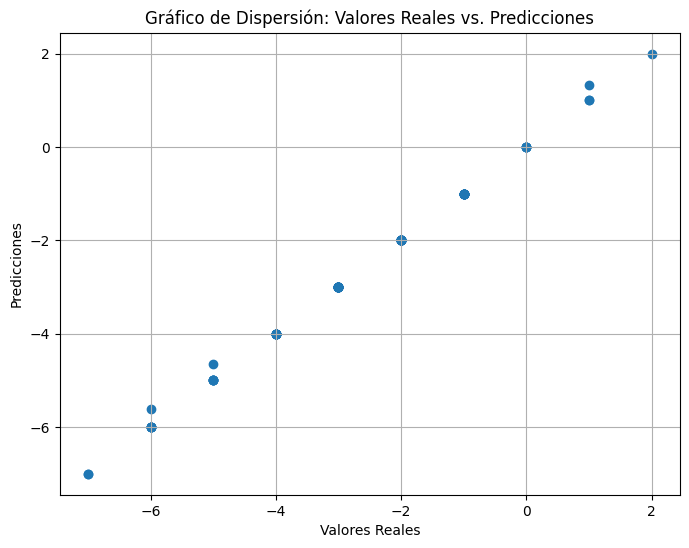

In [19]:
# Gráfico de dispersión para comparar predicciones con valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión: Valores Reales vs. Predicciones")
plt.grid(True)
plt.show()

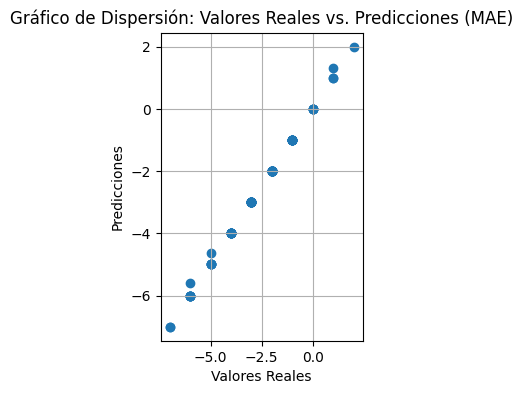

In [20]:
# Gráficos similares al de MSE para MAE, R^2, Exactitud y Precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión: Valores Reales vs. Predicciones (MAE)")
plt.grid(True)
plt.show()

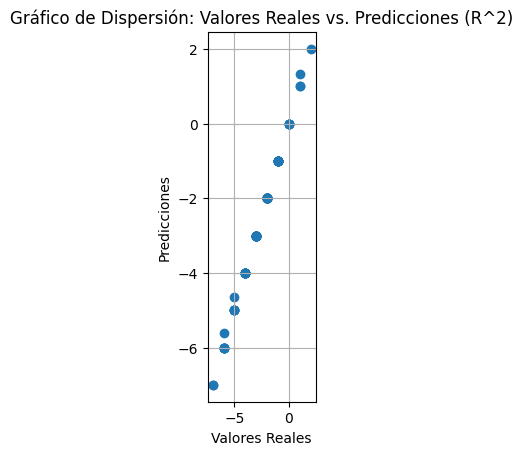

In [21]:
plt.subplot(1, 4, 2)
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión: Valores Reales vs. Predicciones (R^2)")
plt.grid(True)
plt.show()

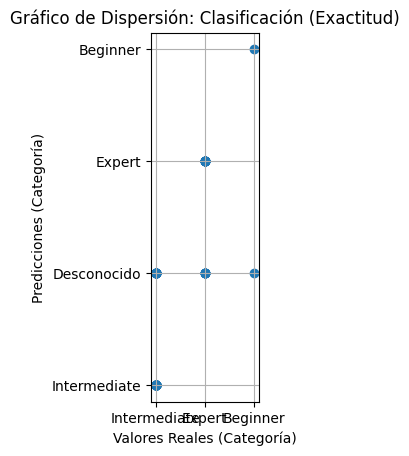

In [22]:
plt.subplot(1, 4, 3)
plt.scatter(y_test_classification, y_pred_classification)
plt.xlabel("Valores Reales (Categoría)")
plt.ylabel("Predicciones (Categoría)")
plt.title("Gráfico de Dispersión: Clasificación (Exactitud)")
plt.grid(True)
plt.show()

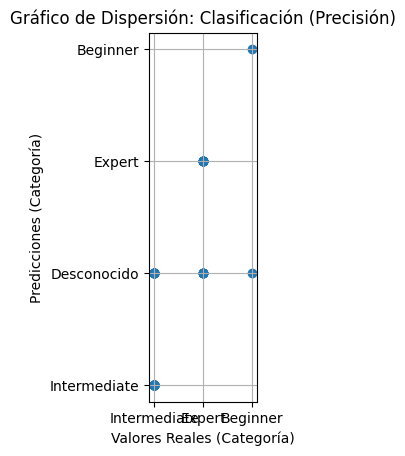

In [23]:
plt.subplot(1, 4, 4)
plt.scatter(y_test_classification, y_pred_classification)
plt.xlabel("Valores Reales (Categoría)")
plt.ylabel("Predicciones (Categoría)")
plt.title("Gráfico de Dispersión: Clasificación (Precisión)")
plt.grid(True)
plt.show()

In [24]:
# Lectura de datos para dataset de ejercicios
ejercicios = pd.read_csv('/megaGymDataset.csv', na_values=[''])

# Eliminar las filas con 'Desc' vacío
ejercicios.dropna(subset=['Desc'], inplace=True)

table_beginner = ejercicios[(ejercicios['Level'] == 'Beginner') & (ejercicios['Equipment'] == 'Body Only')]
table_intermediate = ejercicios[(ejercicios['Level'] == 'Intermediate') & (ejercicios['Equipment'] == 'Body Only')]
table_expert = ejercicios[(ejercicios['Level'] == 'Expert') & (ejercicios['Equipment'] == 'Body Only')]

In [25]:
def asignar_ejercicios(level):
    recomendaciones = []
    tabla_ejercicios = []
    if(level == 'Beginner'):
      tabla_ejercicios = table_beginner
    elif(level == 'Intermediate'):
      tabla_ejercicios = table_intermediate
    elif(level == 'Expert'):
      tabla_ejercicios = table_expert
    else:
      return None

    # Contar la cantidad de tipos de ejercicio
    tipo_counts = tabla_ejercicios['Type'].value_counts()
    types = tabla_ejercicios['Type'].unique()

    for tipo in types:

        # Filtrar los ejercicios de ese tipo
        ejercicios_tipo_recomendado = tabla_ejercicios[tabla_ejercicios['Type'] == tipo]

        # Contar la cantidad de bodyparts distintos en los ejercicios del tipo recomendado
        bodypart_counts = ejercicios_tipo_recomendado['BodyPart'].nunique()

        # Si no se cumple ninguna de las condiciones anteriores, seleccionar 2 ejercicios sin repetir el BodyPart
        bodyparts = ejercicios_tipo_recomendado['BodyPart'].unique()
        for bodypart in bodyparts:
            ejercicios_bodypart = ejercicios_tipo_recomendado.loc[tabla_ejercicios['BodyPart'] == bodypart]
            # Elegir aleatoriamente 1 ejercicio
            recomendacion = ejercicios_bodypart.sample(1)
            recomendaciones.extend(recomendacion.values)  # Desempaqueta la recomendación y agrega los valores

    idsEjercicios = [lista[0] for lista in recomendaciones]
    return idsEjercicios

In [26]:
train['Recomendacion'] = train['Nivel'].apply(asignar_ejercicios)

<ipython-input-26-377288a8a656>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Recomendacion'] = train['Nivel'].apply(asignar_ejercicios)


In [28]:
train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Puntos_Nivel,Nivel,Recomendacion
0,Female,21.000000,1.620000,64.000000,yes,no,2.00000,3.000000,Sometimes,no,2.000000,no,0,1,no,Public_Transportation,Normal_Weight,-3,Intermediate,"[313, 686, 697, 854, 909, 977, 1250, 1400, 150..."
1,Female,21.000000,1.520000,56.000000,yes,no,3.00000,3.000000,Sometimes,yes,3.000000,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,1,Expert,"[2125, 2190]"
2,Male,23.000000,1.800000,77.000000,yes,no,2.00000,3.000000,Sometimes,no,2.000000,no,2,1,Frequently,Public_Transportation,Normal_Weight,-1,Expert,"[2192, 2190]"
3,Male,27.000000,1.800000,87.000000,no,no,3.00000,3.000000,Sometimes,no,2.000000,no,2,0,Frequently,Walking,Overweight_Level_I,0,Expert,"[2125, 2190]"
4,Male,22.000000,1.780000,89.800000,no,no,2.00000,1.000000,Sometimes,no,2.000000,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,-4,Intermediate,"[289, 687, 697, 853, 910, 983, 1255, 1400, 152..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,22.869778,1.795311,89.868784,yes,yes,1.57223,1.888067,Sometimes,no,2.000000,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,-4,Intermediate,"[569, 687, 697, 854, 910, 1026, 1281, 1400, 15..."
996,Female,22.909992,1.700038,80.000000,yes,yes,2.00000,3.000000,Sometimes,no,2.000000,no,0,1,no,Public_Transportation,Overweight_Level_II,-5,Intermediate,"[324, 687, 697, 854, 910, 961, 1250, 1400, 152..."
997,Female,23.000000,1.668649,80.458343,yes,yes,2.00000,2.256119,Sometimes,no,1.142873,no,0,1,no,Public_Transportation,Overweight_Level_II,-5,Intermediate,"[409, 686, 697, 854, 910, 996, 1285, 1400, 152..."
998,Male,24.679807,1.700000,84.687554,yes,yes,2.00000,3.000000,Sometimes,no,2.020424,no,0,1,Sometimes,Public_Transportation,Overweight_Level_II,-5,Intermediate,"[417, 688, 697, 854, 910, 979, 1281, 1400, 151..."
